# 1. Import Libraries and Data Det

In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import KFold
from scipy.cluster.hierarchy import dendrogram

In [2]:
# read in health indicator CSV file:
dat = pd.read_csv("../data/heart_disease_health_indicators_BRFSS2015.csv")
dat.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# 2. Data

## 2.1. Data Description
* Each row represents a unique patient. (253680 observations)
* Each column represents a health indicator. (22 features)
- consists of three types of variable indicating either (i) categorical (1 or 0), (ii) Frequency (int), (iii) Likert-scale (1-5)
* Data was collected by the Behavioral Risk Factor Surveillance System (BRFSS), a health-related telephone survey in 2015. Data is collected annually by the Centers for Disease Control (CDC). Note: data has already been preliminarily cleaned prior to the upload to kaggle. We will directly use the cleaned data.
* Data source: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset?resource=download

* Feature Description: (name and type)
- HeartDiseaseorAttack (yes = 1.0, no = 0.0)
- HighBP (yes = 1.0, no = 0.0)
- HighChol (yes = 1.0, no = 0.0)
- CholCheck (yes = 1.0, no = 0.0)
- BMI (int)
- Smoker (yes = 1.0, no = 0.0)
- Stroke (yes = 1.0, no = 0.0)
- Diabetes (0: no, 1: type 1, 2: type 2)
- PhysActivity (yes = 1.0, no = 0.0)
- Fruits (yes = 1.0, no = 0.0)
- Veggies (yes = 1.0, no = 0.0)
- HvyAlcoholConsump (yes = 1.0, no = 0.0)
- AnyHealthcare (yes = 1.0, no = 0.0)
- NoDocbcCost (yes = 1.0, no = 0.0)
- GenHlth (1-5, likert)
- MentHlth (int, 1-30, likert)
- PhysHlth (int, 1-30, likert)
- DiffWalk (yes = 1.0, no = 0.0)
- Sex (male:1 or female:0)
- Age (int, 1-13)
- Education (int, 1-6)
- Income (int, 1-8)

* There are 0 missing values.

## 2.2. Column Names and Data Information

In [3]:
colnames = list(dat.columns)
print(colnames)

['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [4]:
dat.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
dat.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## 2.3. Summary Statistics

In [6]:
dat.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# 3. Preliminary Visualizations

<AxesSubplot:>

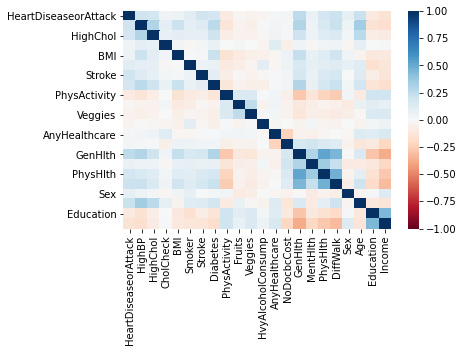

In [7]:
# Correlation Heatmap
ryb = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["green", "yellow", "red"]
)
corr = dat.corr()
corr.style.set_precision(3).background_gradient(cmap="RdBu", vmin=-1, vmax=1)
sns.heatmap(corr, vmin=-1, vmax=1, cmap="RdBu")

### Analysis

1. Log-odds to find variables w/ the strongest relationship with heart disease. 

2. Independence Test between variables regarding the onset of heart-disease/heart attack: 
    (i) $\chi^{2}$ independence test. Assumptions: (a) samples are randomly selected, (b) expected count on average >= 5, (c) number of samples $n_i, n_j$ for i,j = {HeartDiseaseAttack,...,Education}, is not very different. 
    (ii) Permutation Test
    (iii) Comments: $\chi^{2}$ independence test has a higher power if assumptions are met. Otherwise, permutation test has a higher power. 
    
3. Does the level of category X_i have a significant effect on heart-disease? (E.g. X_i = Education, or Income, or GenHlth)
i.e. Is the functional distribution, of all levels of a categorical variable, equal? 
- ANOVA (Assumptions: (a) random samples, (b) k groups are independent, (c) k groups have equal sd-- levene test, (d) error terms are iid normal w/ mean=0, and equal var)
- Nonparametric ANOVA (K-sample permutation Test) 

# 4. Contingency Tables:
Shows relationship between two variables
Measures frequency of a variable-level given the presence of another variable-level.   

Our 8 Variables of interest:

- High blood pressure (HighBP)
- High cholesterol (HighChol)
- Diabetes 
- Phys activity in the past 30 days (PhysActivity)  
- Difficulty walking (DiffWalk)
- Smoking (Smoker)
- Stroke (Stroke)
- Age 

In [41]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

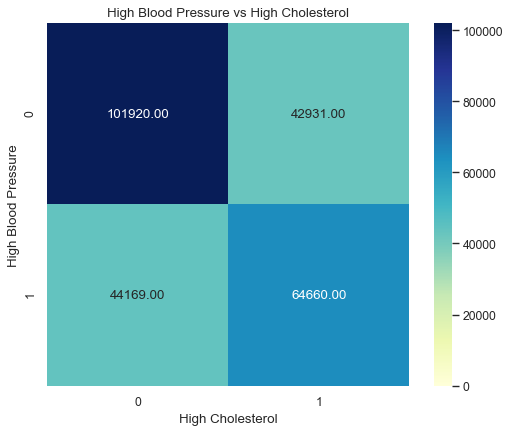

In [50]:
# HighBP v HighChol
data_crosstab = pd.crosstab(dat['HighBP'],
                            dat['HighChol'], 
                               margins = False)
bp_chol = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(bp_chol, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=102000.0)
plt.title('High Blood Pressure vs High Cholesterol',fontsize=12)
plt.savefig('High Blood Pressure vs High Cholesterol', bbox_inches='tight', dpi=100)
plt.xlabel("High Cholesterol")
plt.ylabel("High Blood Pressure")
plt.show()

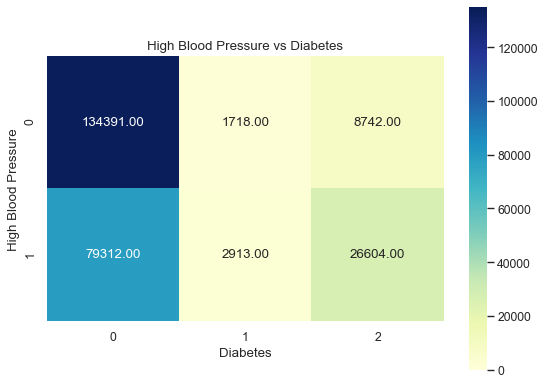

In [53]:
# HighBP v Diabetes
data_crosstab = pd.crosstab(dat['HighBP'],
                            dat['Diabetes'], 
                               margins = False)
bp_diabetes =np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(bp_diabetes, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=135000.0)
plt.title('High Blood Pressure vs Diabetes',fontsize=12)
plt.savefig('High Blood Pressure vs Diabetes', bbox_inches='tight', dpi=100)
plt.xlabel("Diabetes")
plt.ylabel("High Blood Pressure")
plt.show()

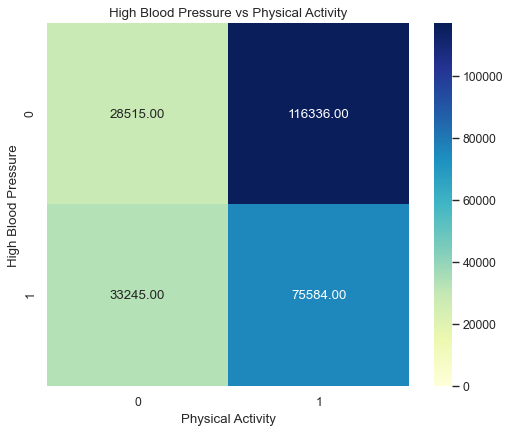

In [54]:
# HighBP v PhysActivity
data_crosstab = pd.crosstab(dat['HighBP'],
                            dat['PhysActivity'], 
                               margins = False)
bp_physactivity = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(bp_physactivity, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=117000.0)
plt.title('High Blood Pressure vs Physical Activity',fontsize=12)
plt.savefig('High Blood Pressure vs Physical Activity', bbox_inches='tight', dpi=100)
plt.xlabel("Physical Activity")
plt.ylabel("High Blood Pressure")
plt.show()

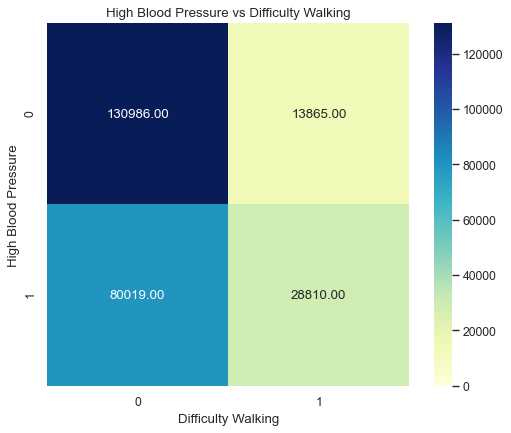

In [55]:
# HighBP v DiffWalk
data_crosstab = pd.crosstab(dat['HighBP'],
                            dat['DiffWalk'], 
                               margins = False)
bp_diffwalk = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(bp_diffwalk, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=131000.0)
plt.title('High Blood Pressure vs Difficulty Walking',fontsize=12)
plt.savefig('High Blood Pressure vs Difficulty Walking', bbox_inches='tight', dpi=100)
plt.xlabel("Difficulty Walking")
plt.ylabel("High Blood Pressure")
plt.show()

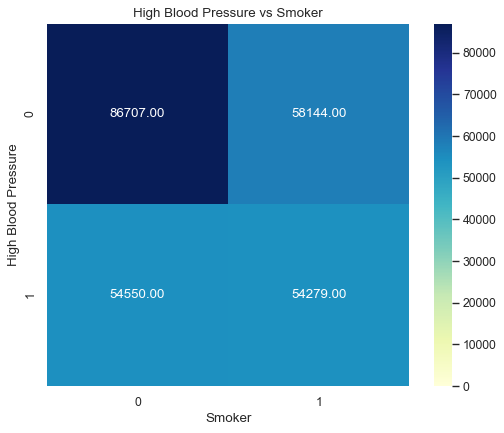

In [56]:
# HighBP v Smoker
data_crosstab = pd.crosstab(dat['HighBP'],
                            dat['Smoker'], 
                               margins = False)
bp_smoker = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(bp_smoker, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=87000.0)
plt.title('High Blood Pressure vs Smoker',fontsize=12)
plt.savefig('High Blood Pressure vs Smoker', bbox_inches='tight', dpi=100)
plt.xlabel("Smoker")
plt.ylabel("High Blood Pressure")
plt.show()

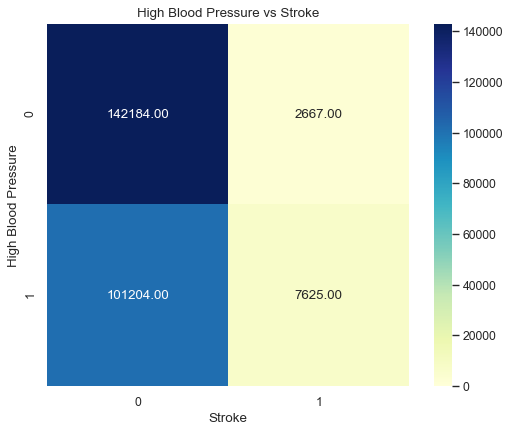

In [57]:
# HighBP v Stroke
data_crosstab = pd.crosstab(dat['HighBP'],
                            dat['Stroke'], 
                               margins = False)
bp_stroke = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(bp_stroke, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=143000.0)
plt.title('High Blood Pressure vs Stroke',fontsize=12)
plt.savefig('High Blood Pressure vs Stroke', bbox_inches='tight', dpi=100)
plt.xlabel("Stroke")
plt.ylabel("High Blood Pressure")
plt.show()

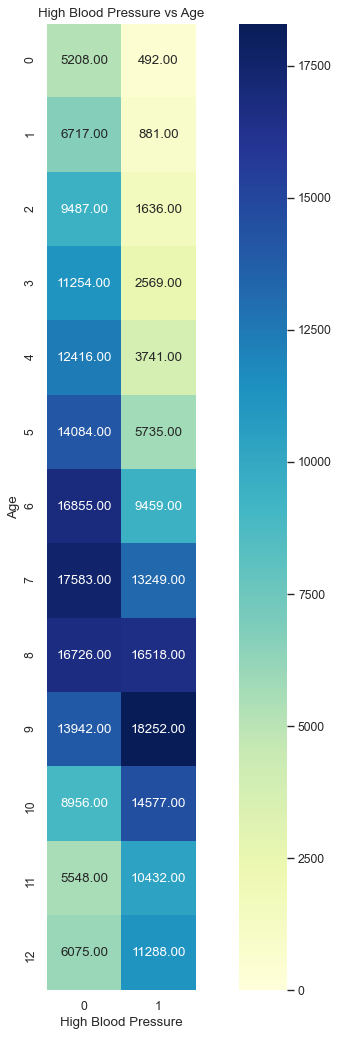

In [61]:
# HighBP v Age
data_crosstab = pd.crosstab(dat['HighBP'],
                            dat['Age'], 
                               margins = False)
bp_age = np.array(data_crosstab)
bp_age = bp_age.T

fig = plt.figure(num=None, figsize=(14, 16), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(bp_age, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=18300.0)
plt.title('High Blood Pressure vs Age',fontsize=12)
plt.savefig('High Blood Pressure vs Age', bbox_inches='tight', dpi=100)
plt.xlabel("High Blood Pressure")
plt.ylabel("Age")
plt.show()

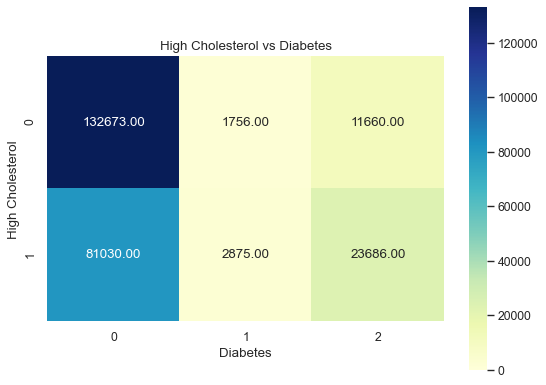

In [62]:
# HighChol v Diabetes
data_crosstab = pd.crosstab(dat['HighChol'],
                            dat['Diabetes'], 
                               margins = False)
chol_dia = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(chol_dia, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=133000.0)
plt.title('High Cholesterol vs Diabetes',fontsize=12)
plt.savefig('High Cholesterol vs Diabetes', bbox_inches='tight', dpi=100)
plt.xlabel("Diabetes")
plt.ylabel("High Cholesterol")
plt.show()

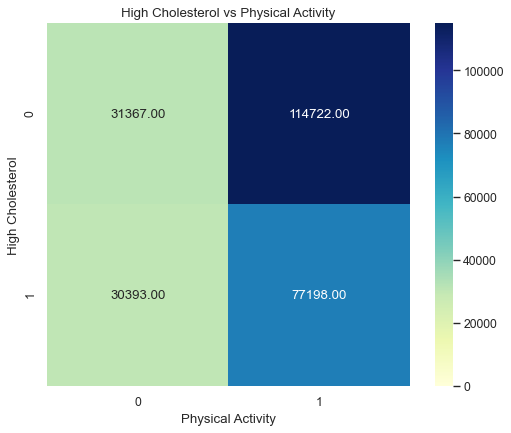

In [63]:
# HighChol v PhysActivity
data_crosstab = pd.crosstab(dat['HighChol'],
                            dat['PhysActivity'], 
                               margins = False)
chol_phys = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(chol_phys, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=115000.0)
plt.title('High Cholesterol vs Physical Activity',fontsize=12)
plt.savefig('High Cholesterol vs Physical Activity', bbox_inches='tight', dpi=100)
plt.xlabel("Physical Activity")
plt.ylabel("High Cholesterol")
plt.show()

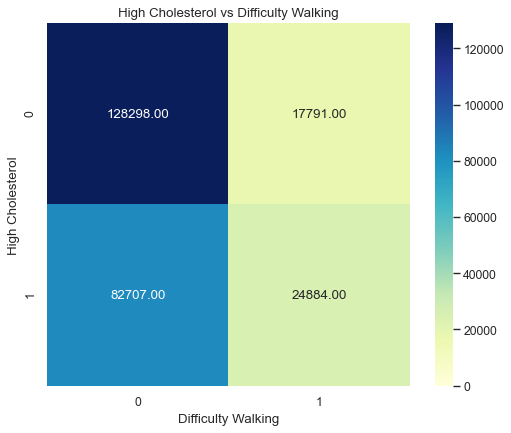

In [64]:
# HighChol v DiffWalk
data_crosstab = pd.crosstab(dat['HighChol'],
                            dat['DiffWalk'], 
                               margins = False)
chol_walk = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(chol_walk, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=129000.0)
plt.title('High Cholesterol vs Difficulty Walking',fontsize=12)
plt.savefig('High Cholesterol vs Difficulty Walking', bbox_inches='tight', dpi=100)
plt.xlabel("Difficulty Walking")
plt.ylabel("High Cholesterol")
plt.show()

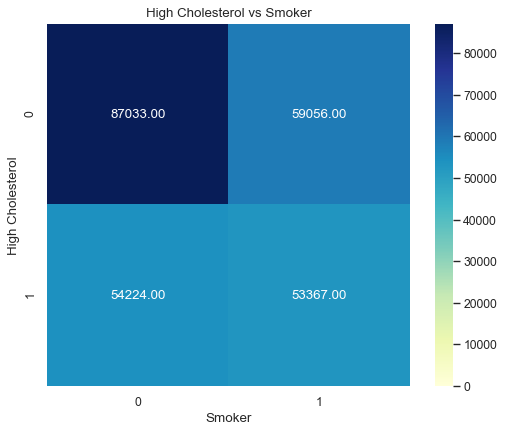

In [65]:
# HighChol v Smoker
data_crosstab = pd.crosstab(dat['HighChol'],
                            dat['Smoker'], 
                               margins = False)
chol_smoker = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(chol_smoker, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=87100.0)
plt.title('High Cholesterol vs Smoker',fontsize=12)
plt.savefig('High Cholesterol vs Smoker', bbox_inches='tight', dpi=100)
plt.xlabel("Smoker")
plt.ylabel("High Cholesterol")
plt.show()

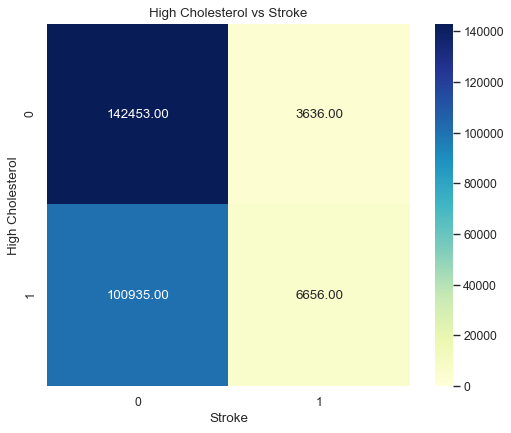

In [66]:
# HighChol v Stroke
data_crosstab = pd.crosstab(dat['HighChol'],
                            dat['Stroke'], 
                               margins = False)
chol_stroke = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(chol_stroke, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=143000.0)
plt.title('High Cholesterol vs Stroke',fontsize=12)
plt.savefig('High Cholesterol vs Stroke', bbox_inches='tight', dpi=100)
plt.xlabel("Stroke")
plt.ylabel("High Cholesterol")
plt.show()

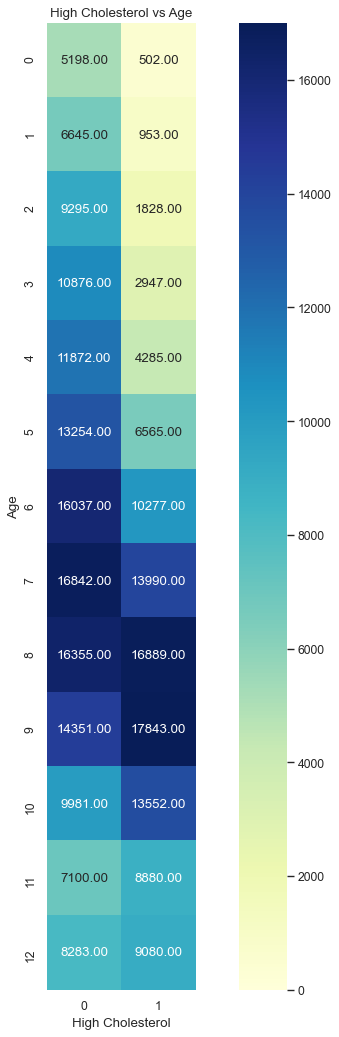

In [67]:
# HighChol v Age
data_crosstab = pd.crosstab(dat['HighChol'],
                            dat['Age'], 
                               margins = False)
chol_age = np.array(data_crosstab).T

fig = plt.figure(num=None, figsize=(14, 16), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(chol_age, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=17000.0)
plt.title('High Cholesterol vs Age',fontsize=12)
plt.savefig('High Cholesterol vs Age', bbox_inches='tight', dpi=100)
plt.xlabel("High Cholesterol")
plt.ylabel("Age")
plt.show()

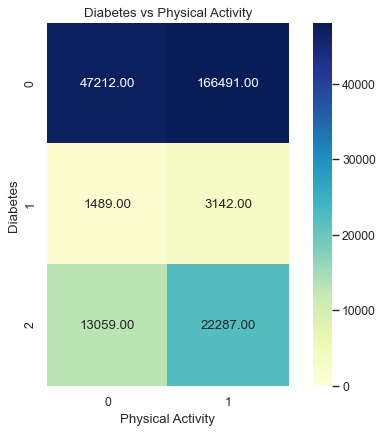

In [68]:
# Diabetes v PhysActivity
data_crosstab = pd.crosstab(dat['Diabetes'],
                            dat['PhysActivity'], 
                               margins = False)
dia_phys = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(dia_phys, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=48000.0)
plt.title('Diabetes vs Physical Activity',fontsize=12)
plt.savefig('Diabetes vs Physical Activity', bbox_inches='tight', dpi=100)
plt.xlabel("Physical Activity")
plt.ylabel("Diabetes")
plt.show()

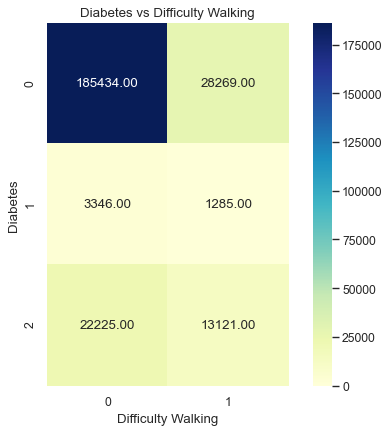

In [69]:
# Diabetes v DiffWalk
data_crosstab = pd.crosstab(dat['Diabetes'],
                            dat['DiffWalk'], 
                               margins = False)
dia_walk = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(dia_walk, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=186000.0)
plt.title('Diabetes vs Difficulty Walking',fontsize=12)
plt.savefig('Diabetes vs Difficulty Walking', bbox_inches='tight', dpi=100)
plt.xlabel("Difficulty Walking")
plt.ylabel("Diabetes")
plt.show()

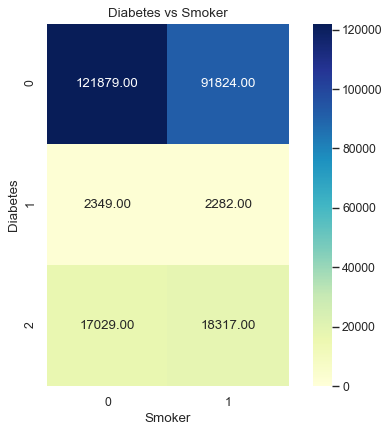

In [71]:
# Diabetes v Smoker
data_crosstab = pd.crosstab(dat['Diabetes'],
                            dat['Smoker'], 
                               margins = False)
dia_smoker = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(dia_smoker, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=122000.0)
plt.title('Diabetes vs Smoker',fontsize=12)
plt.savefig('Diabetes vs Smoker', bbox_inches='tight', dpi=100)
plt.xlabel("Smoker")
plt.ylabel("Diabetes")
plt.show()

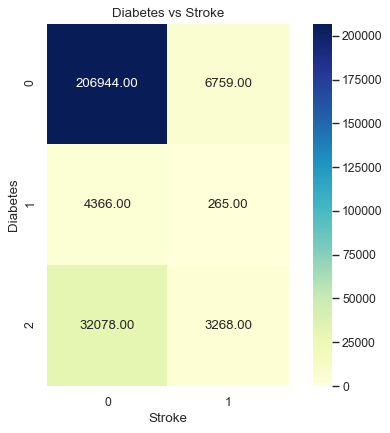

In [72]:
# Diabetes v Stroke
data_crosstab = pd.crosstab(dat['Diabetes'],
                            dat['Stroke'], 
                               margins = False)
dia_stroke = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(dia_stroke, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=207000.0)
plt.title('Diabetes vs Stroke',fontsize=12)
plt.savefig('Diabetes vs Stroke', bbox_inches='tight', dpi=100)
plt.xlabel("Stroke")
plt.ylabel("Diabetes")
plt.show()

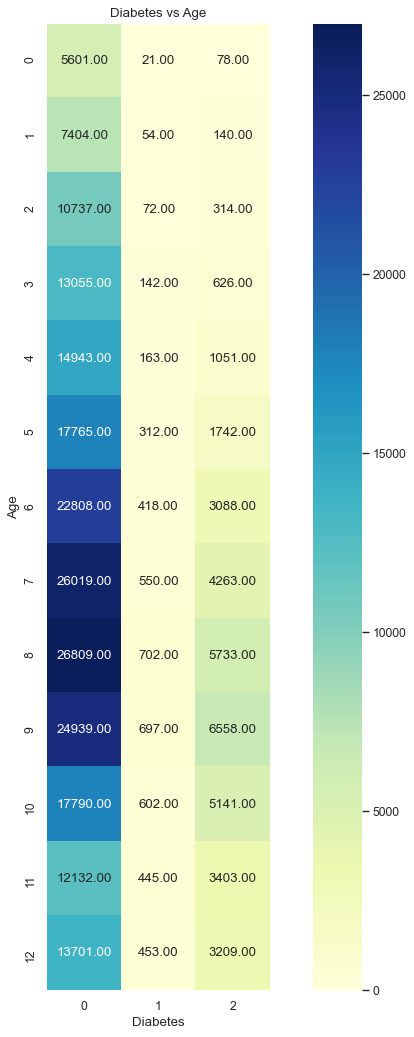

In [74]:
# Diabetes v Age
data_crosstab = pd.crosstab(dat['Diabetes'],
                            dat['Age'], 
                               margins = False)
dia_age = np.array(data_crosstab).T

fig = plt.figure(num=None, figsize=(14, 16), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(dia_age, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=27000.0)
plt.title('Diabetes vs Age',fontsize=12)
plt.savefig('Diabetes vs Age', bbox_inches='tight', dpi=100)
plt.xlabel("Diabetes")
plt.ylabel("Age")
plt.show()

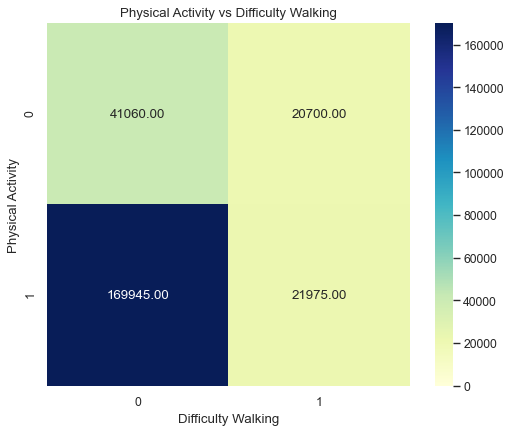

In [78]:
# PhysActivity v DiffWalk
data_crosstab = pd.crosstab(dat['PhysActivity'],
                            dat['DiffWalk'], 
                               margins = False)
phys_diffwalk = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(phys_diffwalk, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=170000.0)
plt.title('Physical Activity vs Difficulty Walking',fontsize=12)
plt.savefig('Physical Activity vs Difficulty Walking', bbox_inches='tight', dpi=100)
plt.xlabel("Difficulty Walking")
plt.ylabel("Physical Activity")
plt.show()

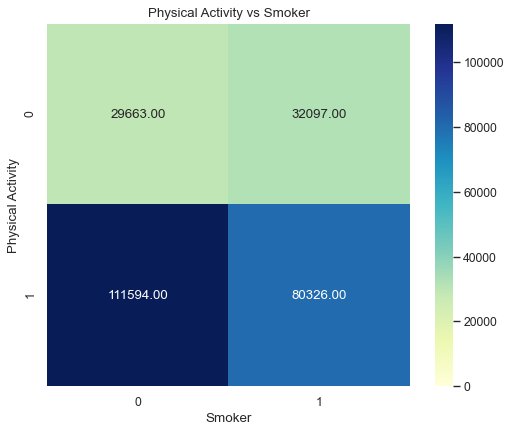

In [79]:
# PhysActivity v Smoker
data_crosstab = pd.crosstab(dat['PhysActivity'],
                            dat['Smoker'], 
                               margins = False)
phys_smoke = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(phys_smoke, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=112000.0)
plt.title('Physical Activity vs Smoker',fontsize=12)
plt.savefig('Physical Activity vs Smoker', bbox_inches='tight', dpi=100)
plt.xlabel("Smoker")
plt.ylabel("Physical Activity")
plt.show()

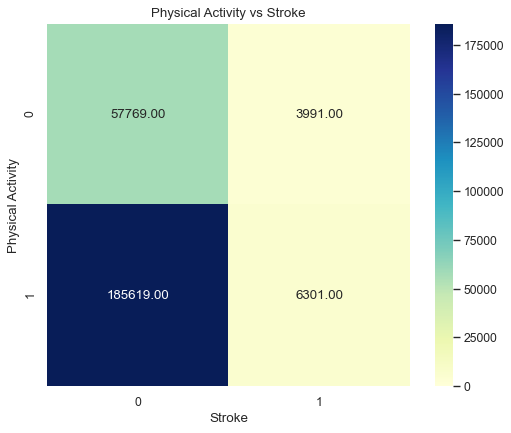

In [91]:
# PhysActivity v Stroke
data_crosstab = pd.crosstab(dat['PhysActivity'],
                            dat['Stroke'], 
                               margins = False)
phys_stroke = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(phys_stroke, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=186000.0)
plt.title('Physical Activity vs Stroke',fontsize=12)
plt.savefig('Physical Activity vs Stroke', bbox_inches='tight', dpi=100)
plt.xlabel("Stroke")
plt.ylabel("Physical Activity")
plt.show()

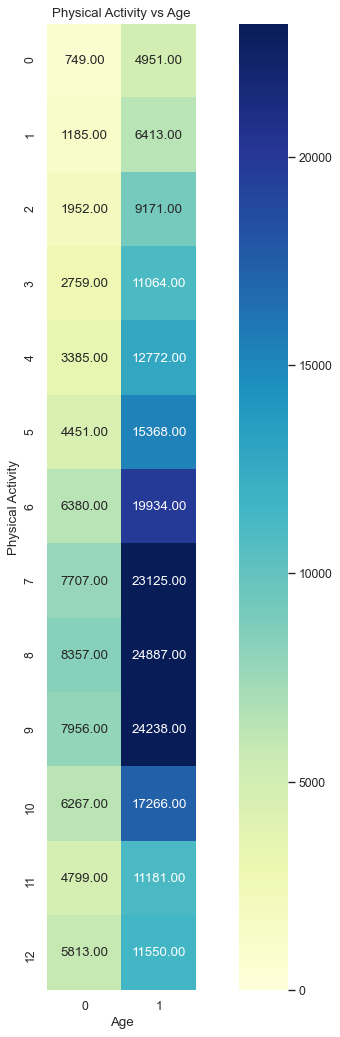

In [90]:
# PhysActivity v Age
data_crosstab = pd.crosstab(dat['PhysActivity'],
                            dat['Age'], 
                               margins = False)
phys_age = np.array(data_crosstab).T

fig = plt.figure(num=None, figsize=(14, 16), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(phys_age, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=23200.0)
plt.title('Physical Activity vs Age',fontsize=12)
plt.savefig('Physical Activity vs Age', bbox_inches='tight', dpi=100)
plt.xlabel("Age")
plt.ylabel("Physical Activity")
plt.show()

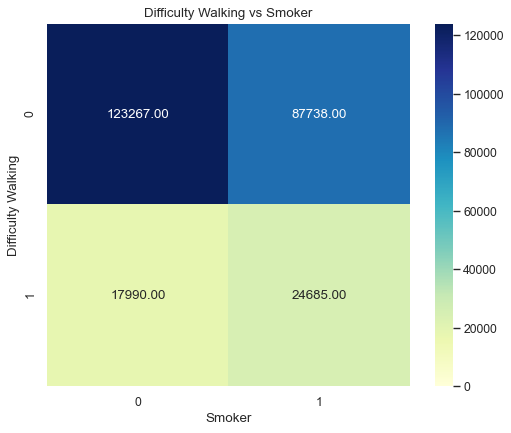

In [82]:
# DiffWalk v Smoker
data_crosstab = pd.crosstab(dat['DiffWalk'],
                            dat['Smoker'], 
                               margins = False)
walk_smoke = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(walk_smoke, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=124000.0)
plt.title('Difficulty Walking vs Smoker',fontsize=12)
plt.savefig('Difficulty Walking vs Smoker', bbox_inches='tight', dpi=100)
plt.xlabel("Smoker")
plt.ylabel("Difficulty Walking")
plt.show()

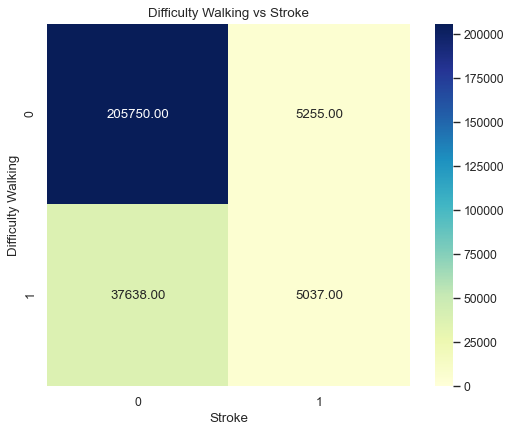

In [83]:
# DiffWalk v Stroke
data_crosstab = pd.crosstab(dat['DiffWalk'],
                            dat['Stroke'], 
                               margins = False)
walk_stroke = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(walk_stroke, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=206000.0)
plt.title('Difficulty Walking vs Stroke',fontsize=12)
plt.savefig('Difficulty Walking vs Stroke', bbox_inches='tight', dpi=100)
plt.xlabel("Stroke")
plt.ylabel("Difficulty Walking")
plt.show()

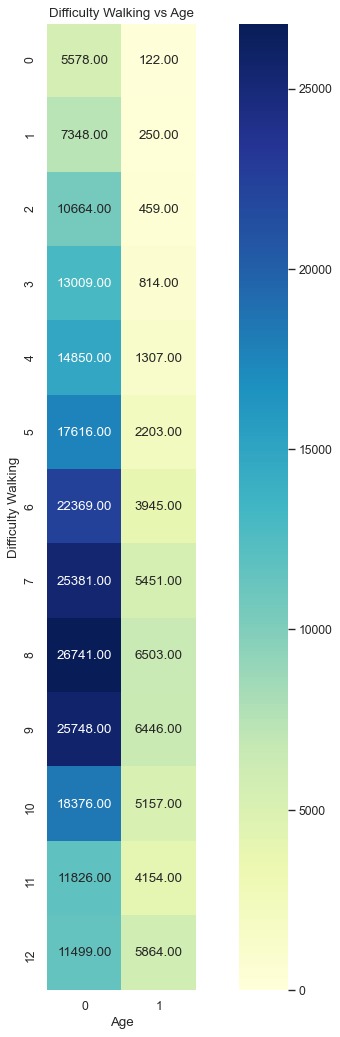

In [89]:
# DiffWalk v Age
data_crosstab = pd.crosstab(dat['DiffWalk'],
                            dat['Age'], 
                               margins = False)
walk_age = np.array(data_crosstab).T

fig = plt.figure(num=None, figsize=(14, 16), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(walk_age, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=26800.0)
plt.title('Difficulty Walking vs Age',fontsize=12)
plt.savefig('Difficulty Walking vs Age', bbox_inches='tight', dpi=100)
plt.xlabel("Age")
plt.ylabel("Difficulty Walking")
plt.show()

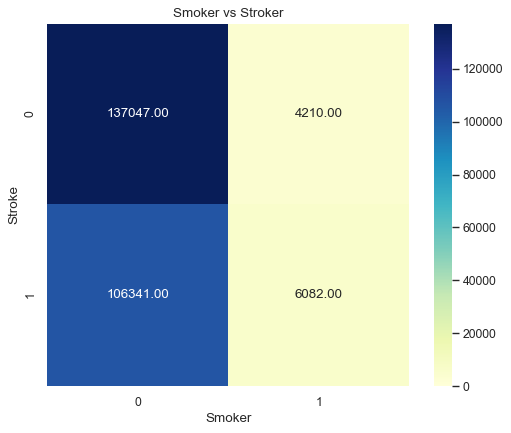

In [85]:
# Smoker v Stroke
data_crosstab = pd.crosstab(dat['Smoker'],
                            dat['Stroke'], 
                               margins = False)
smoke_stroke = np.array(data_crosstab)

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(smoke_stroke, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=137100.0)
plt.title('Smoker vs Stroker',fontsize=12)
plt.savefig('Smoker vs Stroke', bbox_inches='tight', dpi=100)
plt.xlabel("Smoker")
plt.ylabel("Stroke")
plt.show()

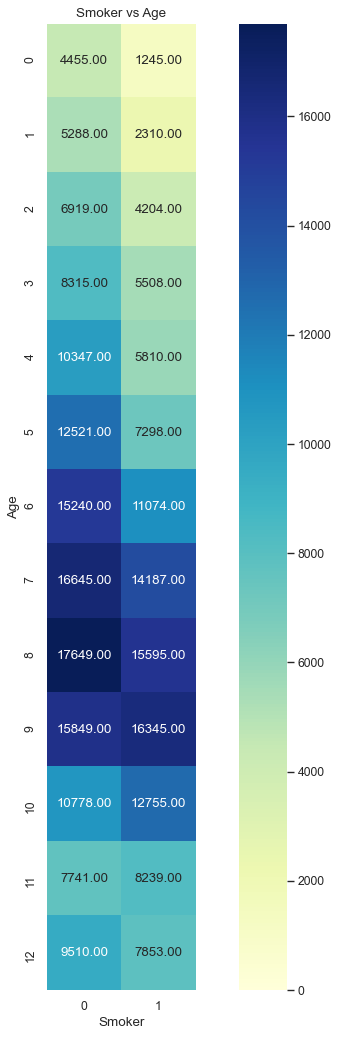

In [88]:
# Smoker v Age
data_crosstab = pd.crosstab(dat['Smoker'],
                            dat['Age'], 
                               margins = False)
smoke_age = np.array(data_crosstab).T

fig = plt.figure(num=None, figsize=(14, 16), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(smoke_age, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=17700.0)
plt.title('Smoker vs Age',fontsize=12)
plt.savefig('Smoker vs Age', bbox_inches='tight', dpi=100)
plt.xlabel("Smoker")
plt.ylabel("Age")
plt.show()

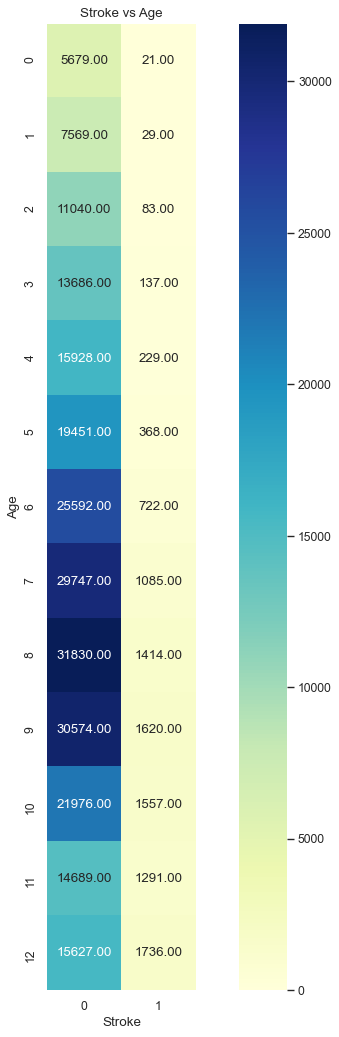

In [102]:
# Stroke v Age
data_crosstab = pd.crosstab(dat['Stroke'],
                            dat['Age'], 
                               margins = False)
stroke_age = np.array(data_crosstab).T

fig = plt.figure(num=None, figsize=(14, 16), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(stroke_age, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=31900.0)
plt.title('Stroke vs Age',fontsize=12)
plt.savefig('Stroke vs Age', bbox_inches='tight', dpi=100)
plt.xlabel("Stroke")
plt.ylabel("Age")
plt.show()

# 5. Side by Side Scatterplot

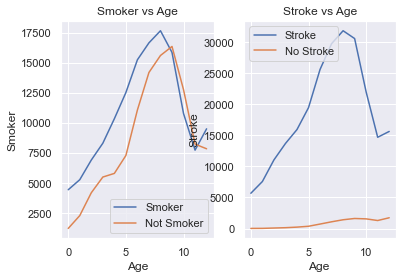

In [103]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(smoke_age)
plt.title("Smoker vs Age")
plt.xlabel('Age')
plt.ylabel('Smoker')
legend_drawn_flag = True
plt.legend(["Smoker", "Not Smoker"], loc=0, frameon=legend_drawn_flag)

plt.subplot(1, 2, 2) # index 2
plt.plot(stroke_age)
plt.title("Stroke vs Age")
plt.xlabel('Age ')
plt.ylabel('Stroke')
legend_drawn_flag = True
plt.legend(["Stroke", "No Stroke"], loc=0, frameon=legend_drawn_flag)

# 6. Hierarchical Clustering

- Procedure:
    - Assign datapoints to clusters using using 2-norm distance metric with a datapoint to cluster-mean linkage type. 
    - In the initial case where # clusters = # datapoints, the cluster mean will just be the location of datapoint.
    - Obviously, only continuous variables will be used to compute distance between variables. (BMI, MentHlth, PhysHlth)
    - Note: we randomly subset 10% of total observations (25,368 obs per subset) and interpret the hierarchical structure. This is to avoid overflow from too many observations.
    
- Interpretation:
    - Claves at highest level of of distance are strictly between clusters with multiple datapoints. There are no outlier observations
    - There exists quite a large 2-norm distance between these last two clusters centroids-- more so than between each mini-cluster and individual observations. It appears that there may exist aggregate hierarchical structure between heart disease and no heart disease. I.e. The two largest structures are highly different since the distance between the highest clave and all other claves is large. 
    - Note that the final two clusters are simply two emergent structures from our data- they may not be associated with our response classes: heart disease, no heart disease.

In [8]:
df_hier_cluster = dat[['BMI','MentHlth','PhysHlth']]

In [9]:
labels = dat[['HeartDiseaseorAttack']]

In [10]:
X = np.array(df_hier_cluster)
X

array([[40., 18., 15.],
       [25.,  0.,  0.],
       [28., 30., 30.],
       ...,
       [28.,  0.,  0.],
       [23.,  0.,  0.],
       [25.,  0.,  0.]])

In [11]:
np.shape(X) 

# Memory error if hierarchical clustering is applied to all 253680 observations. 
# We examine hierchical structure of 10% of observations (25368), randomly selected . 

(253680, 3)

In [12]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

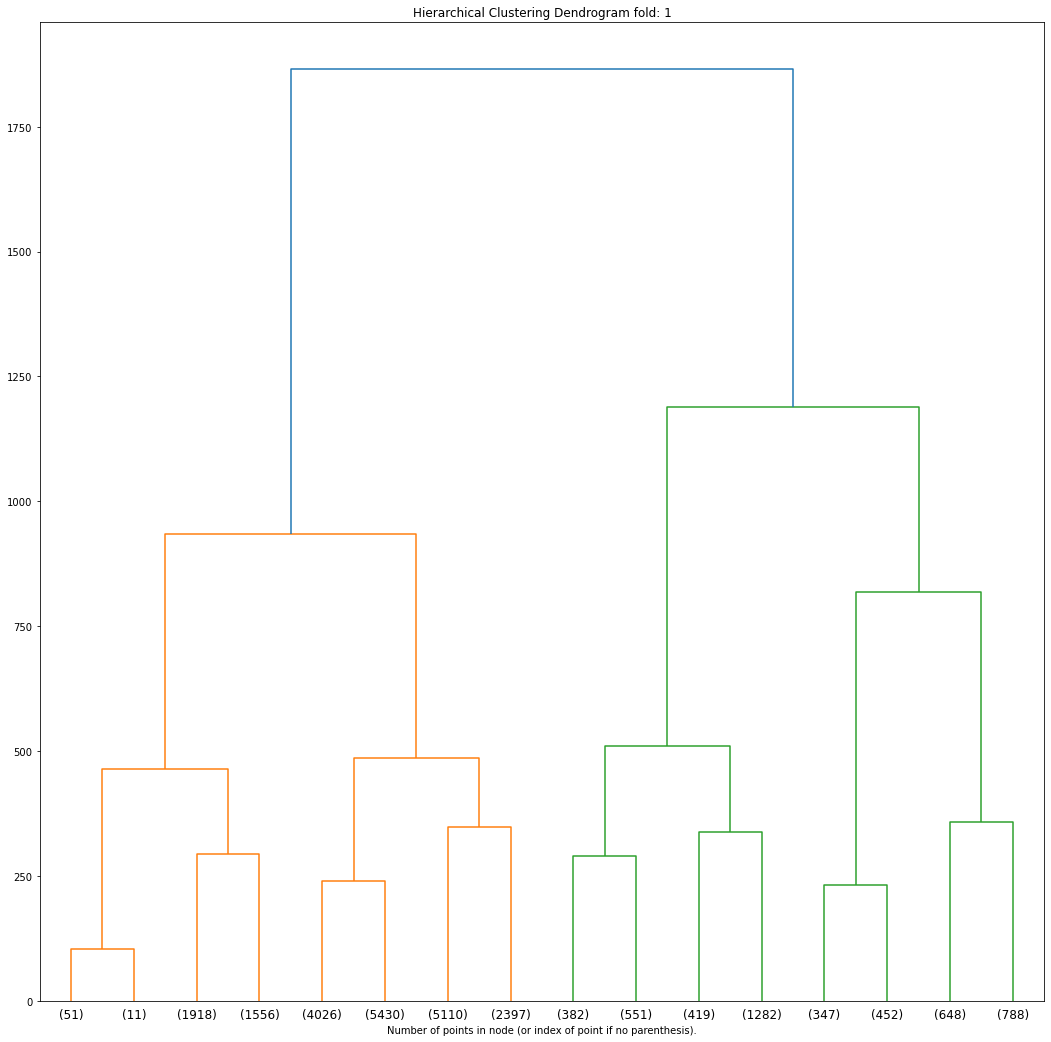

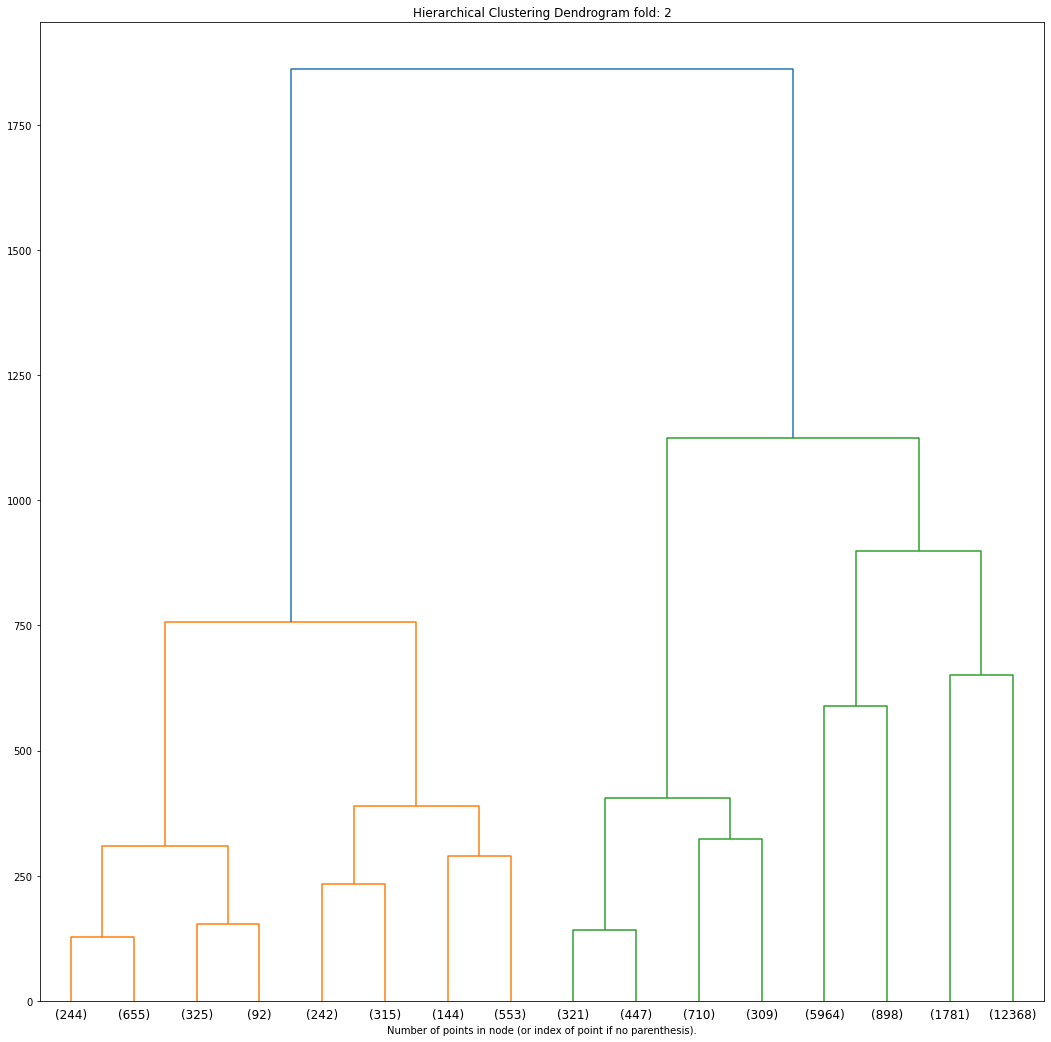

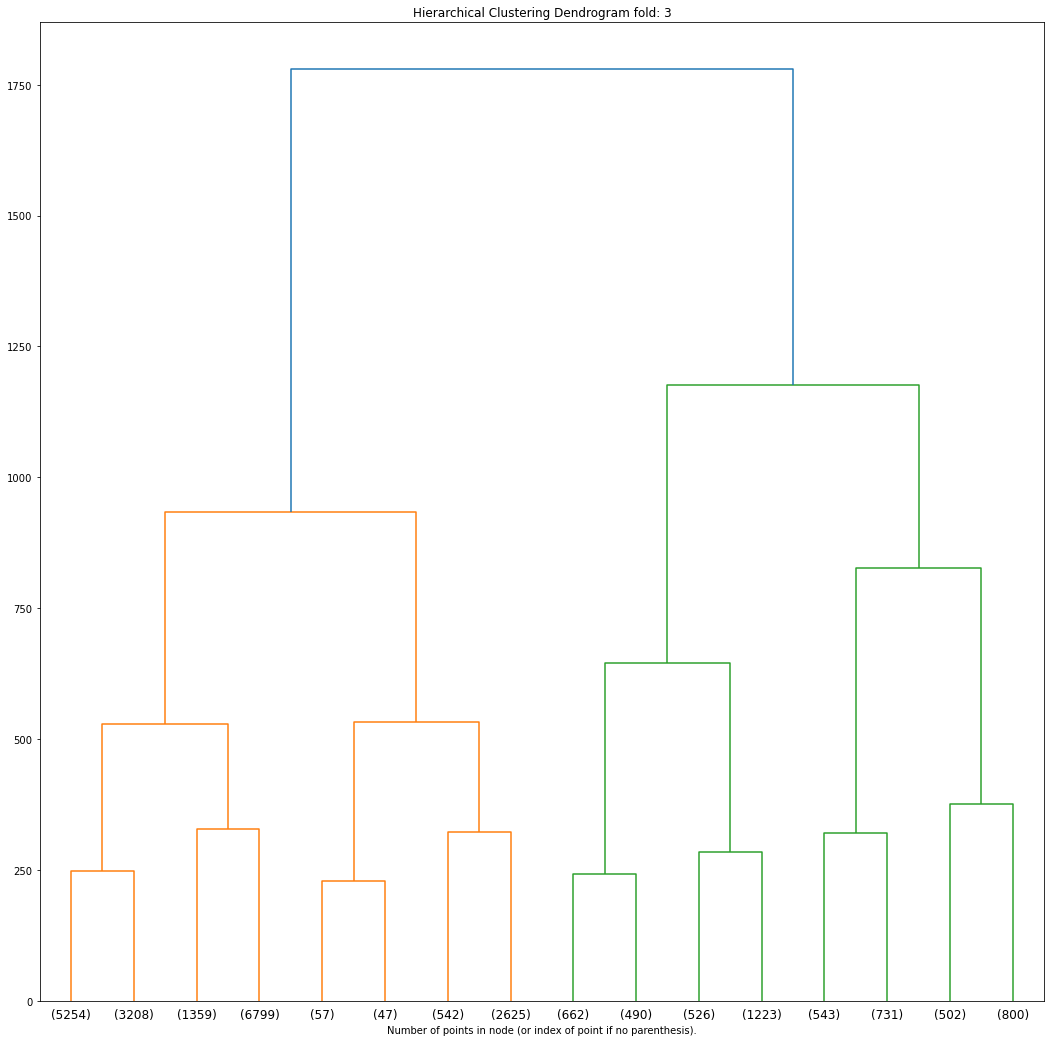

In [16]:
fold = 0
kf = KFold(n_splits = 10, random_state = True, shuffle = True)
plt.rcParams["figure.figsize"] = (18,18)
for train_index, test_index in kf.split(X):
    fold+=1
    temp_X = X[test_index] 
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(temp_X)
    plt.title("Hierarchical Clustering Dendrogram fold: %d" %fold)
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode="level", p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    if fold == 3:
        break